In [1]:
from scipy.io import arff # to import .arff file to a dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
from sklearn.impute import SimpleImputer
%matplotlib inline
os.getcwd()



'/Users/Edureka/Code Files/Python'

## Import ".arff" file to a dataframe

In [4]:
data = arff.loadarff('Autism.arff')
df = pd.DataFrame(data[0])

In [5]:
df.sample(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
82,b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',...,b'f',b'White-European',b'no',b'yes',b'Netherlands',b'no',10.0,b'18 and more',b'Self',b'YES'
451,b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',b'0',b'0',...,b'm',b'Middle Eastern ',b'no',b'no',b'United Arab Emirates',b'no',3.0,b'18 and more',b'Self',b'NO'
413,b'0',b'0',b'1',b'1',b'1',b'0',b'0',b'0',b'0',b'1',...,b'f',b'Middle Eastern ',b'no',b'no',b'United Arab Emirates',b'no',4.0,b'18 and more',b'Self',b'NO'
594,b'1',b'0',b'0',b'0',b'1',b'0',b'0',b'0',b'1',b'1',...,b'm',b'Asian',b'no',b'no',b'India',b'no',4.0,b'18 and more',b'Self',b'NO'
392,b'0',b'1',b'0',b'0',b'0',b'1',b'0',b'1',b'0',b'1',...,b'f',b'Middle Eastern ',b'no',b'no',b'United Arab Emirates',b'no',4.0,b'18 and more',b'Self',b'NO'
305,b'1',b'1',b'0',b'1',b'0',b'0',b'0',b'0',b'0',b'1',...,b'f',b'White-European',b'no',b'no',b'United Kingdom',b'no',4.0,b'18 and more',b'Self',b'NO'
649,b'0',b'1',b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',...,b'm',b'Middle Eastern ',b'yes',b'no',b'United Arab Emirates',b'yes',3.0,b'18 and more',b'Self',b'NO'
666,b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',...,b'm',b'?',b'no',b'no',b'Iraq',b'no',1.0,b'18 and more',b'?',b'NO'
164,b'1',b'0',b'1',b'0',b'1',b'0',b'1',b'1',b'0',b'1',...,b'f',b'Asian',b'no',b'no',b'New Zealand',b'no',6.0,b'18 and more',b'Self',b'NO'
599,b'1',b'0',b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'1',...,b'f',b'Asian',b'no',b'no',b'India',b'no',6.0,b'18 and more',b'Parent',b'NO'


## Lot of scope for data manipulation in this data

### Convert byte characters in columns

### convert object columns to int (having 0 or 1 values)

In [6]:
df['A1_Score'].dtype
df_objects=df.select_dtypes(include=['object'])
df[df_objects.columns]=df[df_objects.columns].apply(lambda x: x.str.decode('utf-8'))

In [7]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
A1_Score           704 non-null object
A2_Score           704 non-null object
A3_Score           704 non-null object
A4_Score           704 non-null object
A5_Score           704 non-null object
A6_Score           704 non-null object
A7_Score           704 non-null object
A8_Score           704 non-null object
A9_Score           704 non-null object
A10_Score          704 non-null object
age                702 non-null float64
gender             704 non-null object
ethnicity          704 non-null object
jundice            704 non-null object
austim             704 non-null object
contry_of_res      704 non-null object
used_app_before    704 non-null object
result             704 non-null float64
age_desc           704 non-null object
relation           704 non-null object
Class/ASD          704 non-null object
dtypes: float64(2), object(19)
memory usage: 115.6+ KB


In [9]:
df.loc[:, df.columns.str.startswith('A')]=df.loc[:, df.columns.str.startswith('A')].astype('int64')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
A1_Score           704 non-null int64
A2_Score           704 non-null int64
A3_Score           704 non-null int64
A4_Score           704 non-null int64
A5_Score           704 non-null int64
A6_Score           704 non-null int64
A7_Score           704 non-null int64
A8_Score           704 non-null int64
A9_Score           704 non-null int64
A10_Score          704 non-null int64
age                702 non-null float64
gender             704 non-null object
ethnicity          704 non-null object
jundice            704 non-null object
austim             704 non-null object
contry_of_res      704 non-null object
used_app_before    704 non-null object
result             704 non-null float64
age_desc           704 non-null object
relation           704 non-null object
Class/ASD          704 non-null object
dtypes: float64(2), int64(10), object(9)
memory usage: 115.6+ KB


In [11]:
df.sample(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
272,1,1,1,1,1,1,1,1,1,1,...,m,White-European,no,no,Netherlands,no,10.0,18 and more,Self,YES
394,1,0,0,0,1,1,0,1,0,1,...,f,Black,no,no,United Arab Emirates,no,5.0,18 and more,Self,NO
45,1,0,1,1,1,1,0,1,1,0,...,f,White-European,no,no,New Zealand,no,7.0,18 and more,Relative,YES
380,0,0,0,1,0,0,1,0,0,0,...,f,?,no,no,Jordan,no,2.0,18 and more,?,NO
279,0,1,1,0,1,0,0,0,0,0,...,m,Hispanic,yes,no,Nicaragua,no,3.0,18 and more,Self,NO
568,1,1,1,1,1,1,0,1,1,1,...,f,White-European,yes,yes,Netherlands,no,9.0,18 and more,Self,YES
686,1,0,0,0,1,0,1,1,0,1,...,m,White-European,no,no,United States,no,5.0,18 and more,Self,NO
287,1,0,0,1,1,0,0,1,0,1,...,m,White-European,no,no,United States,no,5.0,18 and more,Self,NO
289,1,1,1,0,1,1,1,0,1,1,...,m,White-European,yes,no,United Kingdom,no,8.0,18 and more,Self,YES
507,0,1,1,0,1,0,0,1,0,0,...,m,White-European,no,no,Belgium,no,4.0,18 and more,Self,NO


## Dataset have "?" as Nan Values. replace "?" with np.nan

In [12]:
#df1=df[df.values=='?'].replace({"?":np.nan})
cols=df.isin(['?']).columns

In [13]:
df=df[cols].replace({'?':np.nan})

In [14]:
df.isnull().sum()

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 2
gender              0
ethnicity          95
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           95
Class/ASD           0
dtype: int64

## Impute null values with Simple Imputer and Strategy as 'Most Frequent'

In [15]:
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
null_cols=df.columns
df.iloc[:,[10,12,19]]=imputer.fit_transform(df.iloc[:,[10,12,9]])
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
A1_Score           704 non-null int64
A2_Score           704 non-null int64
A3_Score           704 non-null int64
A4_Score           704 non-null int64
A5_Score           704 non-null int64
A6_Score           704 non-null int64
A7_Score           704 non-null int64
A8_Score           704 non-null int64
A9_Score           704 non-null int64
A10_Score          704 non-null int64
age                704 non-null float64
gender             704 non-null object
ethnicity          704 non-null object
jundice            704 non-null object
austim             704 non-null object
contry_of_res      704 non-null object
used_app_before    704 non-null object
result             704 non-null float64
age_desc           704 non-null object
relation           704 non-null int64
Class/ASD          704 non-null object
dtypes: float64(2), int64(11), object(8)
memory usage: 115.6+ KB


In [17]:
categorical=[c for c in df.columns if df.dtypes[c]=='object']
continous=[c for c in df.columns if df.dtypes[c]!='object']

## Conver Catagorical to Continous variable

In [18]:
df[categorical]=df[categorical].apply(lambda x: LabelEncoder().fit_transform(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
A1_Score           704 non-null int64
A2_Score           704 non-null int64
A3_Score           704 non-null int64
A4_Score           704 non-null int64
A5_Score           704 non-null int64
A6_Score           704 non-null int64
A7_Score           704 non-null int64
A8_Score           704 non-null int64
A9_Score           704 non-null int64
A10_Score          704 non-null int64
age                704 non-null float64
gender             704 non-null int64
ethnicity          704 non-null int64
jundice            704 non-null int64
austim             704 non-null int64
contry_of_res      704 non-null int64
used_app_before    704 non-null int64
result             704 non-null float64
age_desc           704 non-null int64
relation           704 non-null int64
Class/ASD          704 non-null int64
dtypes: float64(2), int64(19)
memory usage: 115.6 KB


## Split the features and target values

In [19]:
target=df['Class/ASD']
features=df.drop('Class/ASD',axis=1)

## Create train and test datasets

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=999)

In [21]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((563, 20), (563,), (141, 20), (141,))

## Creat Logistic Regression Model

In [28]:
glm=LogisticRegression(max_iter=200)

In [29]:
lgregressor=glm.fit(xtrain,ytrain)

/Users/nagarajugooty/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Predict the data using test dataset

In [30]:
predict=glm.predict(xtest)

In [31]:
predict

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0])

## Create Confusion Matrix and Calculate Accuracy

In [32]:
cm=confusion_matrix(ytest,predict)

In [33]:
acc=accuracy_score(ytest,predict)
acc

1.0

In [34]:
cm

array([[103,   0],
       [  0,  38]])

In [35]:
lgregressor.predict_proba(xtest)[:,1] # probability values of two class target variables

array([9.26219790e-01, 5.11239512e-08, 9.99991839e-01, 6.60574680e-12,
       5.02035201e-06, 4.56448410e-10, 9.99297407e-01, 8.77102090e-01,
       7.66964256e-02, 9.99203978e-01, 7.71899425e-06, 5.11716010e-08,
       5.86131153e-06, 5.23604376e-14, 7.62068296e-06, 9.98957554e-01,
       6.49980752e-10, 3.93754928e-10, 8.03088766e-06, 6.07888038e-12,
       9.41896658e-06, 3.36404689e-12, 7.52266962e-06, 6.47617626e-02,
       8.94223617e-01, 6.47423082e-06, 5.34144187e-04, 4.39700149e-14,
       8.17169030e-08, 6.92941414e-02, 9.03212127e-01, 9.39268107e-01,
       9.99990949e-01, 7.93841582e-06, 5.83847494e-08, 7.84412575e-08,
       6.23491948e-12, 7.06802661e-06, 1.00744803e-01, 8.74719956e-01,
       9.99993313e-01, 7.66312114e-02, 5.15454699e-10, 9.99989761e-01,
       9.13746770e-06, 5.65447509e-08, 9.99999912e-01, 5.43821311e-06,
       4.55675842e-08, 5.23367833e-08, 9.98916776e-01, 4.94208629e-06,
       6.50481171e-04, 6.93113554e-06, 7.94961196e-04, 1.08545634e-05,
      

## Plot the ROC Curve

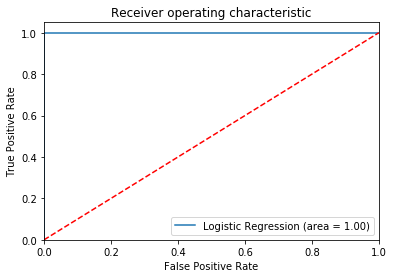

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(ytest, predict)
fpr, tpr, thresholds = roc_curve(ytest, lgregressor.predict_proba(xtest)[:,1])

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',)
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.annotate('local maximum', xy=(10, 1), xytext=(10, 4),
#           arrowprops=dict(facecolor='black'))

#plt.annotate('local minimum', xy=(5 * np.pi, 1), xytext=(2, 6),
#            arrowprops=dict(arrowstyle="->",
#                           connectionstyle="angle3,angleA=0,angleB=-90"));
plt.savefig('Log_ROC')
plt.show()